# Lab13: Stock price prediction
### Réalisé par: Othmane AMRANI MARRAKCHI
### EMSI 2024/2025


# T.A.F
1. Démarrer 
2. Analyser
3. Améliorer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Dense

# Step 1: Dataset
 url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [3]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values #open col and convert it to a NumPy array
print(dataset_train)
# Data transformation
sc = MinMaxScaler(feature_range=(0,1)) #vals between 0 and 1
training_set_scaled = sc.fit_transform(training_set) #Normalization(values between 0 and 1) x scaled=X-Xmin/Xmax-Xmin
print(training_set_scaled)
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0]) #...
    y_train.append(training_set_scaled[i, 0]) #...
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #Reshape to 3d array(Number of samples, Number of time steps, ...)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

# Step 2: Model

In [5]:
# Initialize the RNN model
model = Sequential()

# Add the first SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth SimpleRNN layer without return_sequences
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

# Add the Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: train

In [10]:
model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
62/62 [==============================] - 5s 38ms/step - loss: 0.3812
Epoch 2/30
62/62 [==============================] - 2s 37ms/step - loss: 0.1866
Epoch 3/30
62/62 [==============================] - 2s 40ms/step - loss: 0.1119
Epoch 4/30
62/62 [==============================] - 4s 62ms/step - loss: 0.0697
Epoch 5/30
62/62 [==============================] - 3s 51ms/step - loss: 0.0452
Epoch 6/30
62/62 [==============================] - 3s 50ms/step - loss: 0.0375
Epoch 7/30
62/62 [==============================] - 3s 48ms/step - loss: 0.0279
Epoch 8/30
62/62 [==============================] - 3s 55ms/step - loss: 0.0211
Epoch 9/30
62/62 [==============================] - 4s 59ms/step - loss: 0.0167
Epoch 10/30
62/62 [==============================] - 3s 54ms/step - loss: 0.0122
Epoch 11/30
62/62 [==============================] - 3s 53ms/step - loss: 0.0114
Epoch 12/30
62/62 [==============================] - 3s 47ms/step - loss: 0.0102
Epoch 13/30
62/62 [==================

# Step 4: test
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'

1/1 [==============================] - 0s 463ms/step


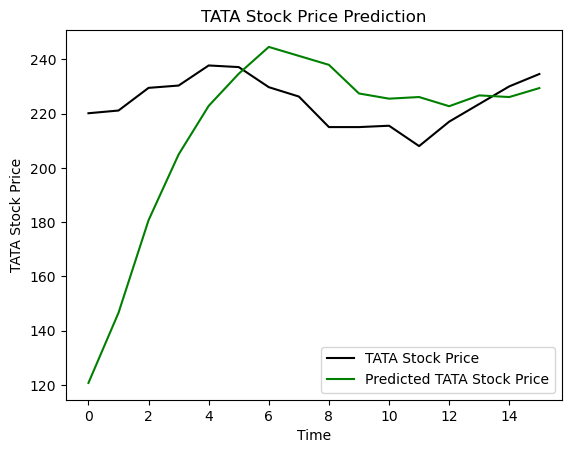

In [13]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
print()

#  save the model

In [16]:
#model.save('tata_model.h5')